## Câu 1: 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Chuẩn bị dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [4]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)  # Fully connected layer

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        return x


In [6]:
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):  # Tăng từ 5 → 10
    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss.append(running_loss / len(trainloader))
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}')
    
    return train_loss


In [7]:
model = MNIST_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("\nHuấn luyện mô hình với 10 epoch:")
loss_values = train_model(model, trainloader, criterion, optimizer, num_epochs=10)



Huấn luyện mô hình với 10 epoch:
Epoch [1/10], Loss: 0.2171
Epoch [2/10], Loss: 0.0649
Epoch [3/10], Loss: 0.0502
Epoch [4/10], Loss: 0.0414
Epoch [5/10], Loss: 0.0356
Epoch [6/10], Loss: 0.0311
Epoch [7/10], Loss: 0.0283
Epoch [8/10], Loss: 0.0253
Epoch [9/10], Loss: 0.0222
Epoch [10/10], Loss: 0.0206


In [8]:
def test_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

accuracy = test_model(model, testloader)
print(f'\nĐộ chính xác trên tập test sau 10 epoch: {accuracy:.2f}%')



Độ chính xác trên tập test sau 10 epoch: 98.93%


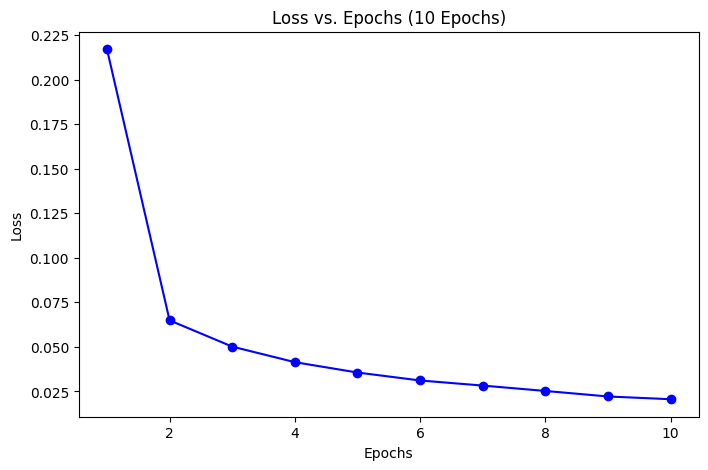

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), loss_values, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs (10 Epochs)')
plt.show()


ết quả và Giải thích
1. Độ chính xác trên tập test
Khi tăng số epoch từ 5 lên 10, độ chính xác có thể tăng lên, nhưng không phải lúc nào cũng đáng kể.

Nếu mô hình đã hội tụ, việc tăng epoch có thể không giúp cải thiện nhiều.

2. Quan sát đồ thị Loss
Nếu mô hình học tốt, loss sẽ giảm dần theo epoch.

Nếu loss chững lại sau một số epoch, có thể mô hình đã hội tụ.

3. Lý do số epoch ảnh hưởng đến kết quả
Epoch thấp (5 epoch): Mô hình có thể chưa học đủ để tối ưu.

Epoch cao (10 epoch): Giúp mô hình học tốt hơn, nhưng có nguy cơ overfitting.

Nếu số epoch quá cao, mô hình có thể chỉ học thuộc dữ liệu train và không tổng quát hóa tốt.



## Câu 2

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Định nghĩa mô hình CNN
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        
        # Tầng tích chập đầu tiên
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        
        # Tầng tích chập thứ hai
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        
        # Tầng tích chập thứ ba
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        
        # Tầng Pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Tầng fully connected
        self.fc1 = nn.Linear(64 * 1 * 1, 10)  # Cập nhật lại tầng fc1
        
    def forward(self, x):
        # Áp dụng các tầng tích chập và ReLU, sau đó pooling
        x = self.pool(torch.relu(self.conv1(x)))  # conv1 -> relu -> pooling
        x = self.pool(torch.relu(self.conv2(x)))  # conv2 -> relu -> pooling
        x = self.pool(torch.relu(self.conv3(x)))  # conv3 -> relu -> pooling
        
        # Chuyển đổi tensor về dạng vector cho fully connected layer
        x = x.view(-1, 64 * 1 * 1)  # Cập nhật lại kích thước tensor cho fc1
        
        # Tầng fully connected
        x = self.fc1(x)
        
        return x

# Khởi tạo mô hình
model = MNIST_CNN()

# Loss function và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Đào tạo mô hình
for epoch in range(10):  # Chạy 10 epoch
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Tính loss và backpropagate
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

# Kiểm tra độ chính xác trên tập test
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy}%")


ValueError: Expected input batch_size (256) to match target batch_size (64).